In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import warnings
warnings.filterwarnings('ignore')

# plt.style.use('fivethirtyeight')


%matplotlib inline

In [2]:
df=pd.read_csv('data_rev3.csv')
df.shape

(81315, 33)

In [3]:
# df.drop(['accept'],axis=1,inplace=True)

In [4]:
df_num=df.drop(['accept'],axis=1).select_dtypes(['float64','int64'])
df_cat=df.select_dtypes(['object'])
print('Continious Variables :',df_num.columns.values,'   ', len(df_num.columns.values))
print('Categorical Variables :',df_cat.columns.values,'',len(df_cat.columns.values))

Continious Variables : ['oam_activelogin_cnt' 'called_numcalls_cnt' 'curr_usage'
 'deposit_onhand_amt' 'numweblog_cnt' 'zipcode' 'home_value' 'segment'
 'customer_id' 'meter_id']     10
Categorical Variables : ['order_day' 'tos_flg' 'disconotice_flg' 'term_length' 'latefee_flg'
 'dwelling_type_cd' 'product_type_cd' 'pool' 'automatic_payment_flg'
 'weblog_flg' 'risk_level' 'ebill_enroll_flag' 'called_flg' 'oam_flg'
 'sap_productname' 'disconnects_flg' 'load_profile' 'city' 'county' 'tdsp'
 'dma' 'ev_driver']  22


## Univariate Analysis

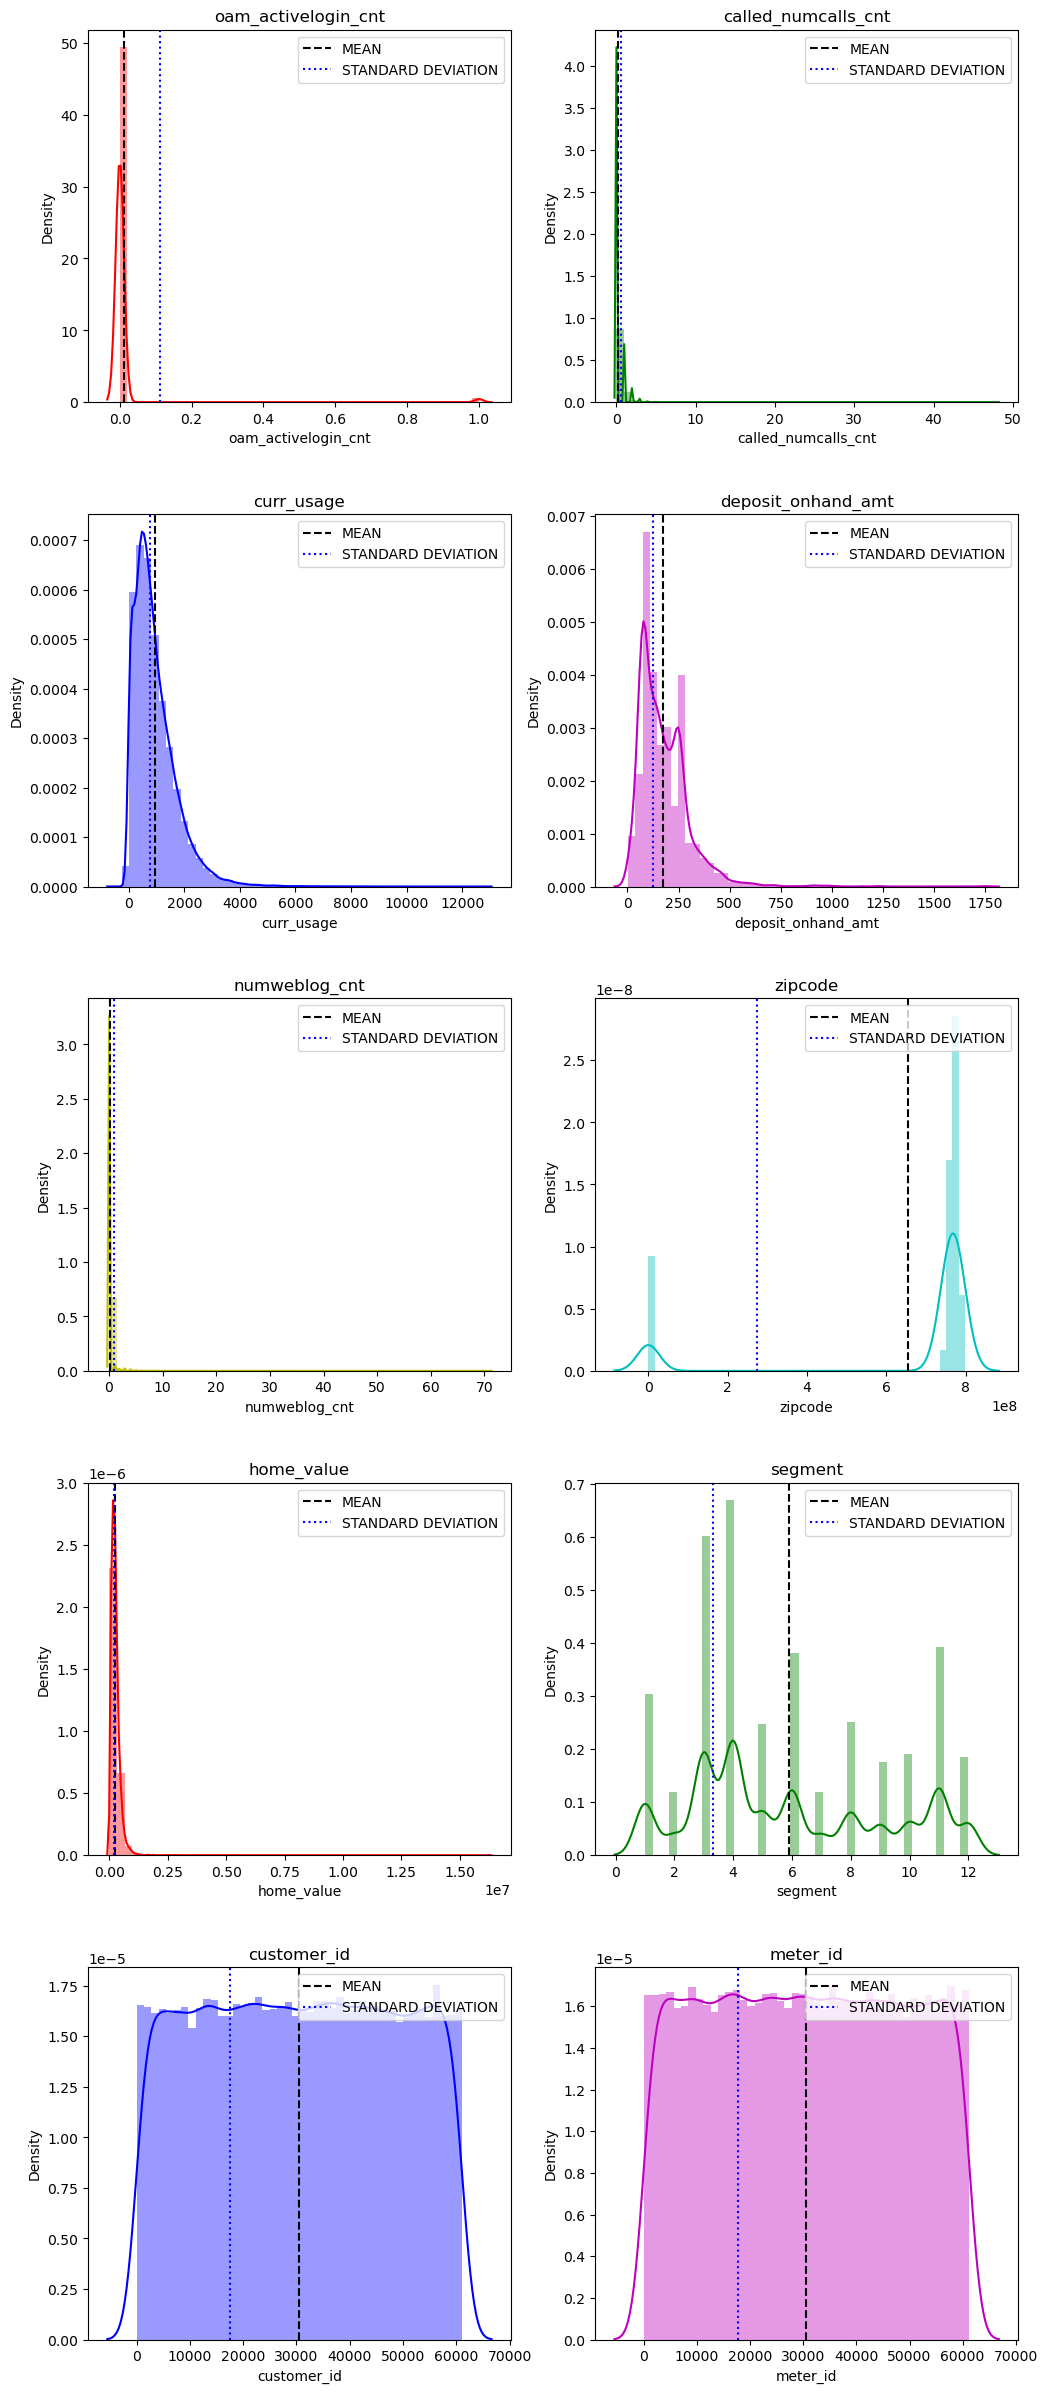

In [5]:
columns = df_num.columns
length  = len(columns)
colors  = ["r","g","b","m","y","c","r","g","b","m"] 

plt.figure(figsize=(12,30))
for i,j,k in itertools.zip_longest(columns,range(length),colors):
    plt.subplot(5,2,j+1)
    #print(length/2,length/3,j+1)
    sns.distplot(df_num[i],color=k)
    #sns.boxplot(df_num[i+1],color=k)
    plt.title(i)
    plt.subplots_adjust(hspace = .3)
    plt.axvline(df_num[i].mean(),color = "k",linestyle="dashed",label="MEAN")
    plt.axvline(df_num[i].std(),color = "b",linestyle="dotted",label="STANDARD DEVIATION")
    plt.legend(loc="upper right")
    

### Observations

- Left Skewed features : 'oam_activelogin_cnt' 'called_numcalls_cnt' 'curr_usage''deposit_onhand_amt' 'numweblog_cnt'  'home_value' 
- home_value heavily left skewed
- Segment # 4 have largest # of customers

## Boxplots

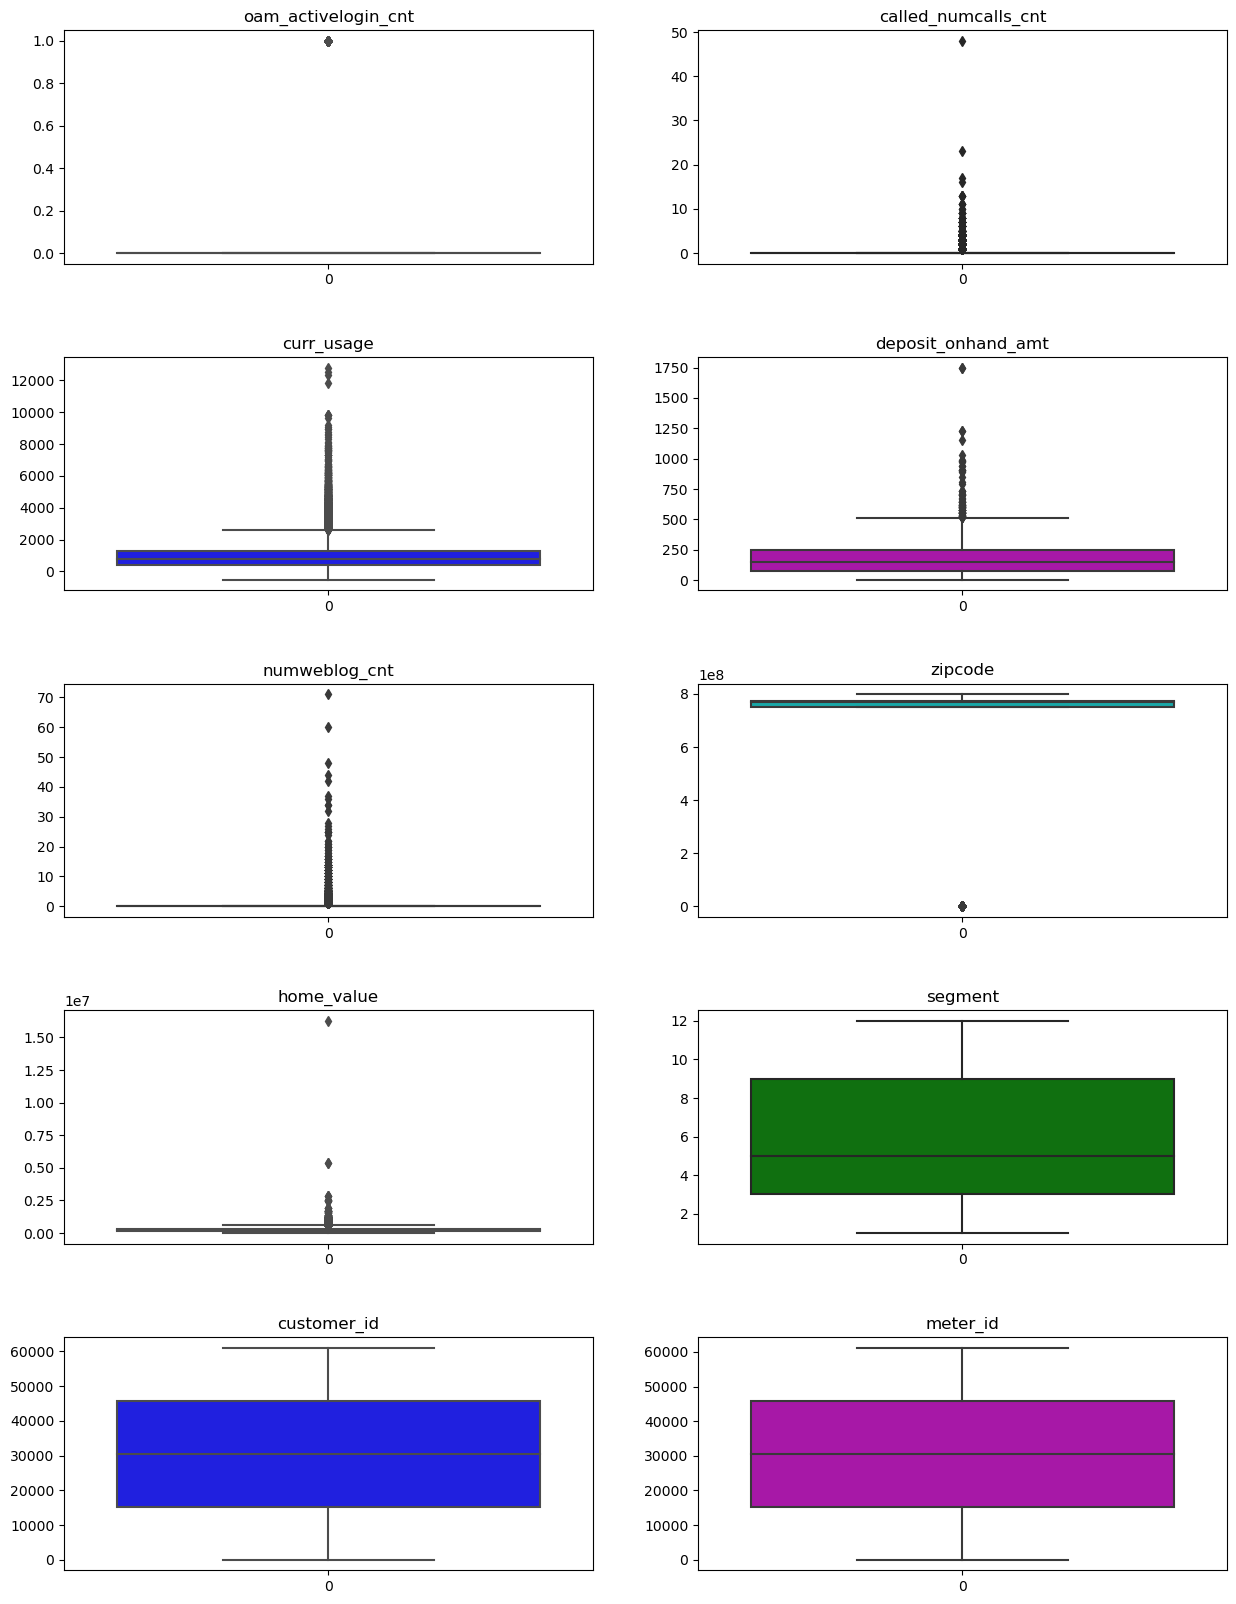

In [8]:
columns = df_num.columns
length  = len(columns)
colors  = ["r","g","b","m","y","c","r","g","b","m"] 

plt.figure(figsize=(15,20))
for i,j,k in itertools.zip_longest(columns,range(length),colors):
    plt.subplot(5,2,j+1)
    sns.boxplot(df_num[i],color=k)
    plt.title(i)
    plt.subplots_adjust(hspace = .4)
    #plt.axvline(df_num[i].mean(),color = "k",linestyle="dashed",label="MEAN")
    #plt.axvline(df_num[i].std(),color = "b",linestyle="dotted",label="STANDARD DEVIATION")
    # plt.legend(loc="upper right")
    

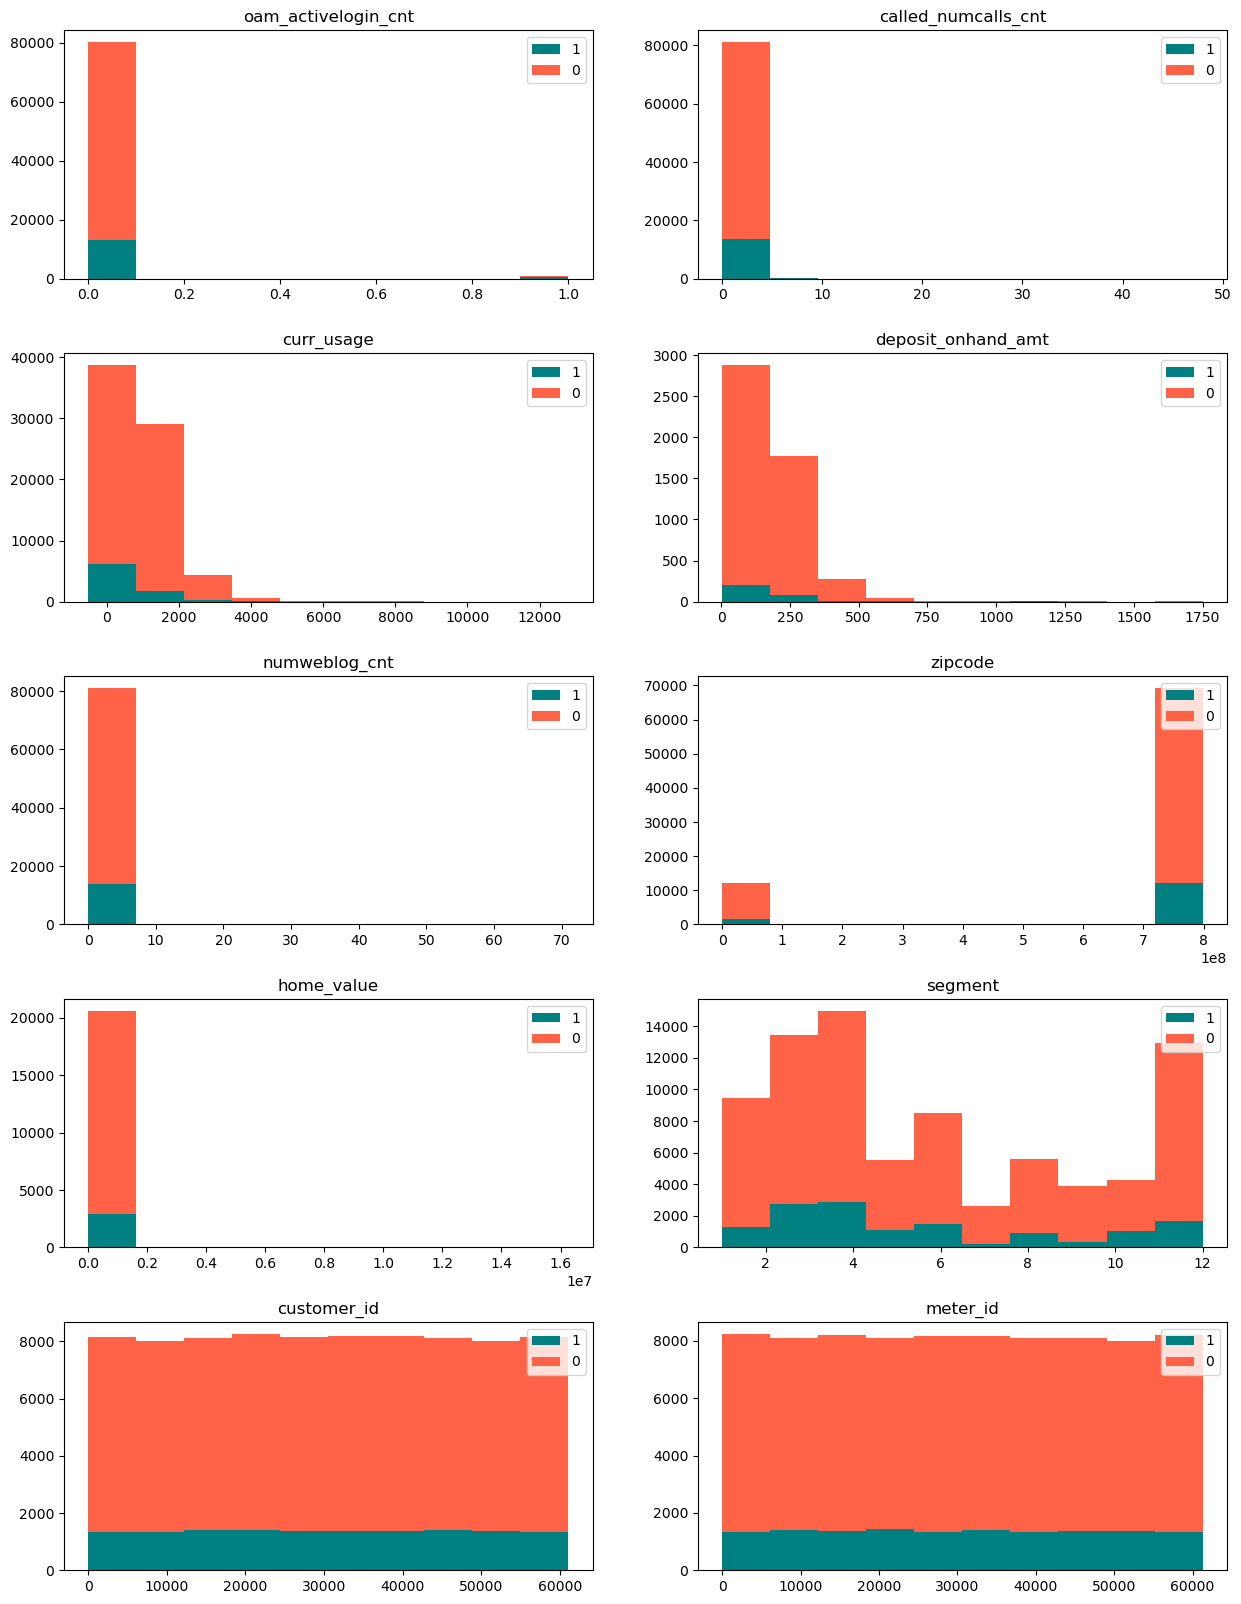

In [13]:
columns = df_num.columns
length  = len(columns)
#colors  = ["r","g","b","m","y","c","k","orange"] 

plt.figure(figsize=(15,20))
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot(5,2,j+1)
    plt.hist(x = [df[df['accept']==1][i], df[df['accept']==0][i]], 
         stacked=True, color = ['teal','tomato'],label = ['1','0'])
    plt.title(i)
    plt.subplots_adjust(hspace = .3)
    #plt.axvline(df_num[i].mean(),color = "k",linestyle="dashed",label="MEAN")
    #plt.axvline(df_num[i].std(),color = "b",linestyle="dotted",label="STANDARD DEVIATION")
    plt.legend(loc="upper right")
    

### Bivariate Analysis

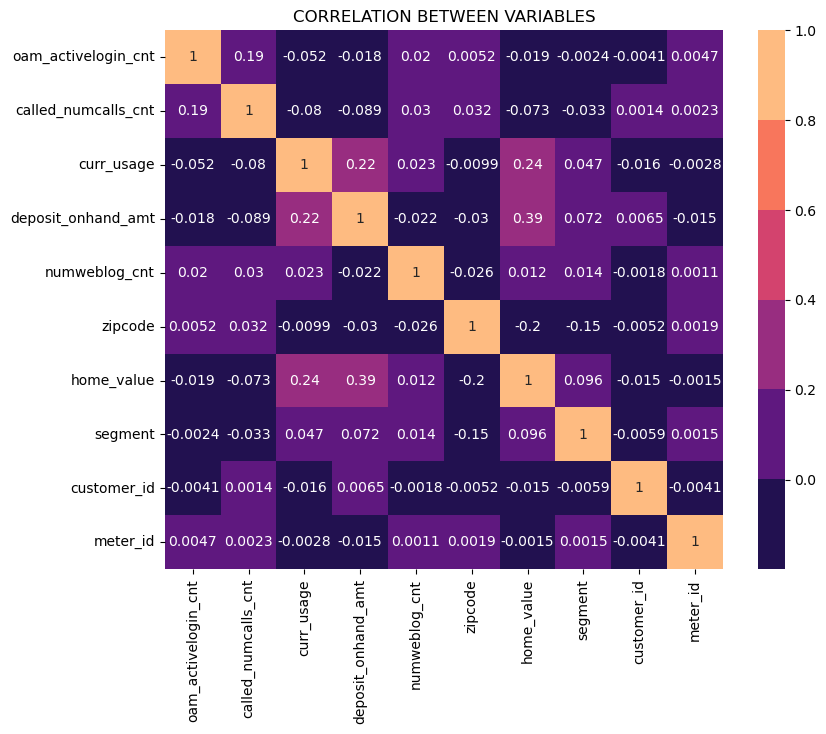

In [14]:
correlation = df_num.corr()
plt.figure(figsize=(9,7))
sns.heatmap(correlation,annot=True,edgecolor="k",cmap=sns.color_palette("magma"))
plt.title("CORRELATION BETWEEN VARIABLES")
plt.show()

## Scatterplot

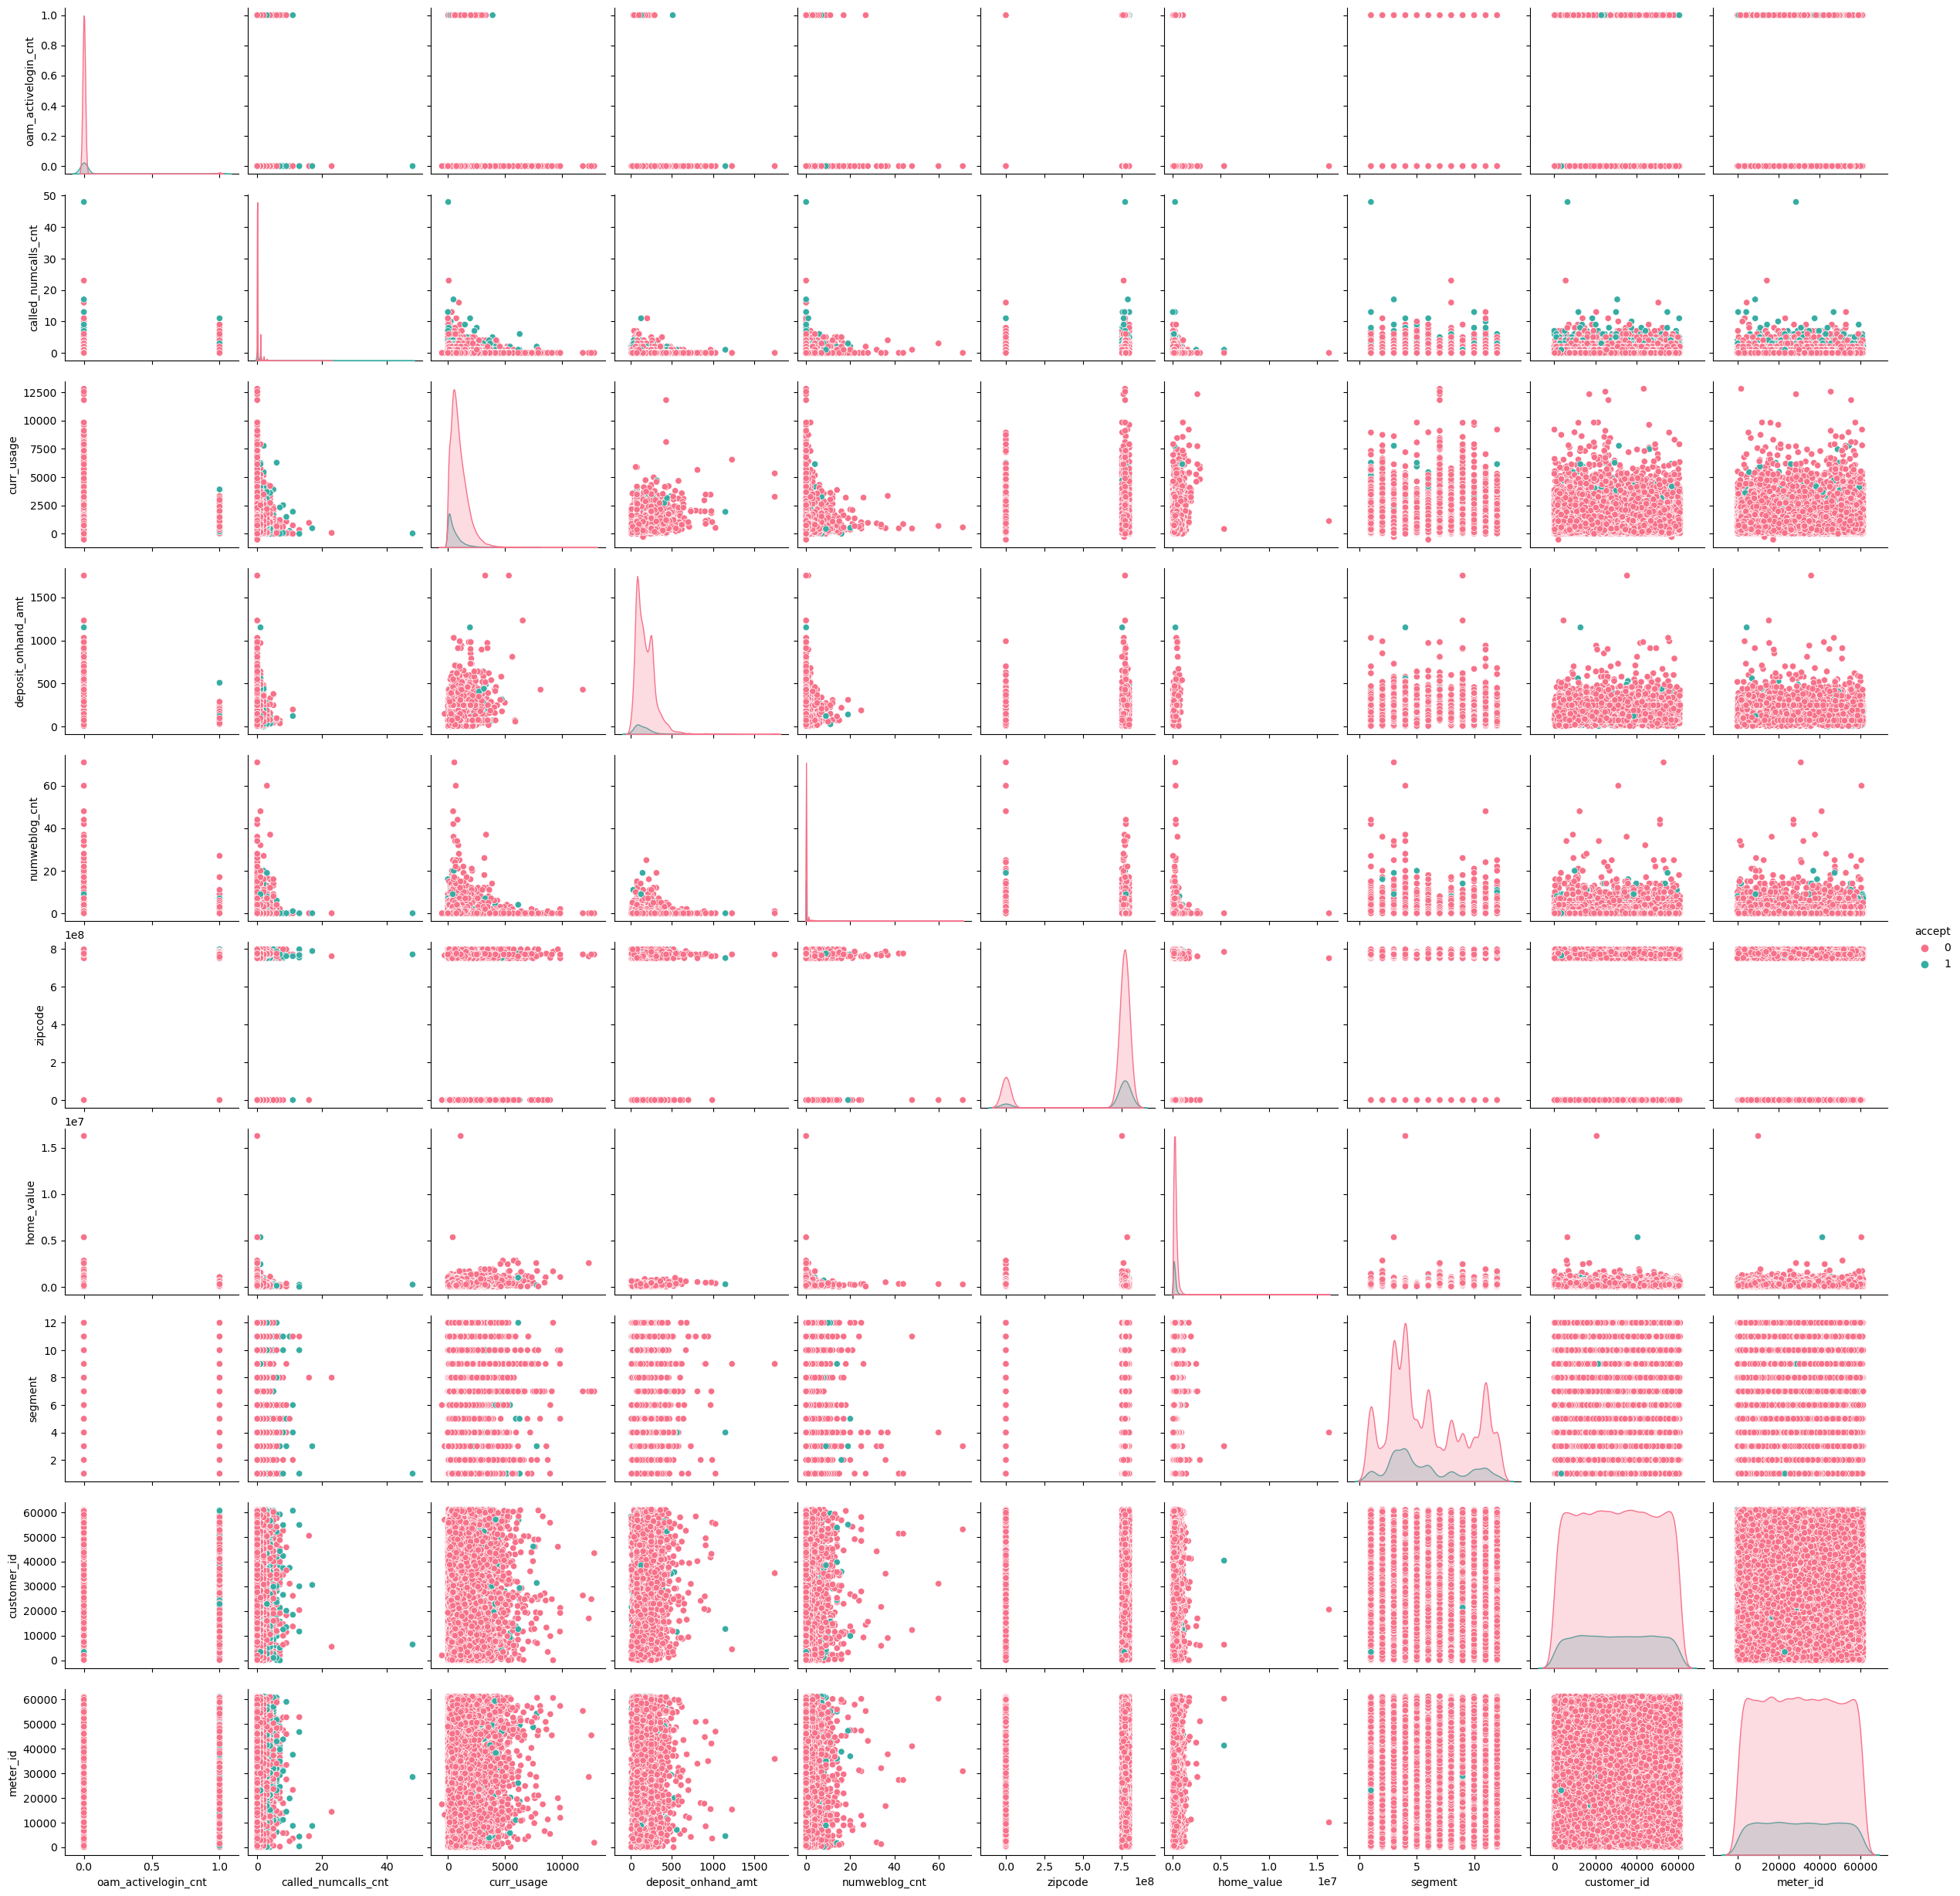

In [15]:
sns.pairplot(df,hue='accept',\
             vars=list(df_num.columns)
            , palette="husl")
plt.show()

## COrrelation b/w Categorical & target variable

In [16]:
# Categorical Variables : ['order_day' 'tos_flg' 'disconotice_flg' 'term_length' 'latefee_flg'
#  'dwelling_type_cd' 'product_type_cd' 'pool' 'automatic_payment_flg'
#  'weblog_flg' 'risk_level' 'ebill_enroll_flag' 'called_flg' 'oam_flg'
#  'sap_productname' 'disconnects_flg' 'load_profile' 'city' 'county' 'tdsp'
#  'dma' 'ev_driver']

In [27]:
def gen_ctgy_relation(col_name):
    f,ax=plt.subplots(1,2,figsize=(12,3))
    df[[col_name,'accept']].groupby([col_name]).mean().plot.bar(ax=ax[0])
    tit='Mean : accept vs ' + col_name
    ax[0].set_title(tit)
    sns.countplot(df, x=col_name, hue="accept",ax=ax[1])
    tit1='Count : '+col_name+' vs accept'
    ax[1].set_title(tit1)
    plt.show()
    

In [36]:
df_cat.columns

Index(['order_day', 'tos_flg', 'disconotice_flg', 'term_length', 'latefee_flg',
       'dwelling_type_cd', 'product_type_cd', 'pool', 'automatic_payment_flg',
       'weblog_flg', 'risk_level', 'ebill_enroll_flag', 'called_flg',
       'oam_flg', 'sap_productname', 'disconnects_flg', 'load_profile', 'city',
       'county', 'tdsp', 'dma', 'ev_driver'],
      dtype='object')

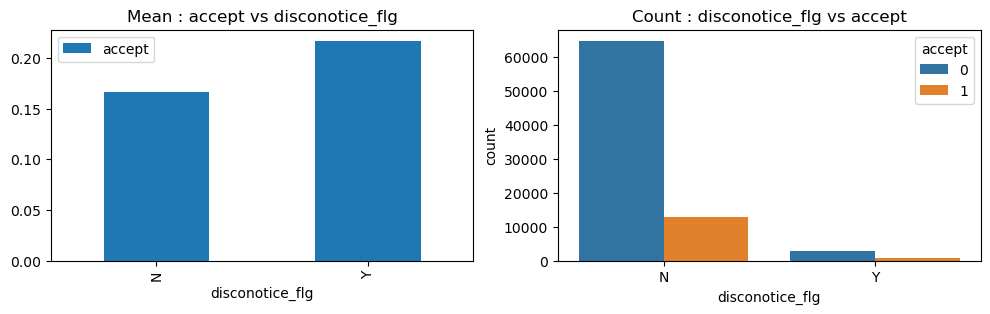

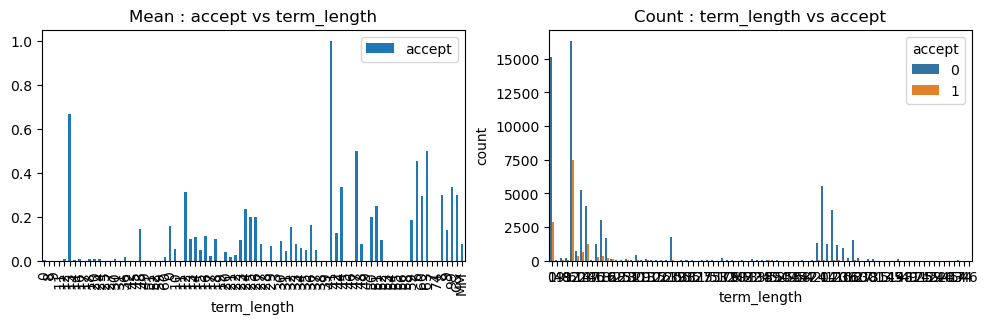

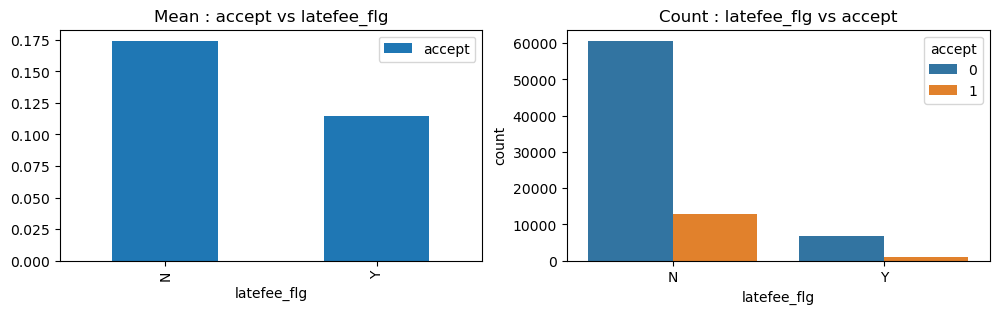

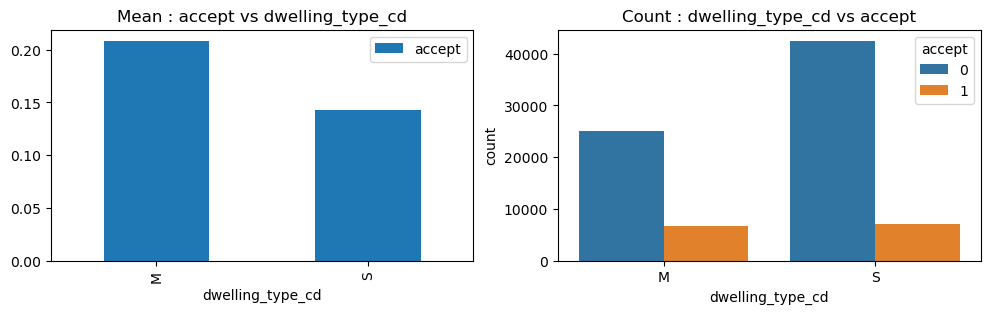

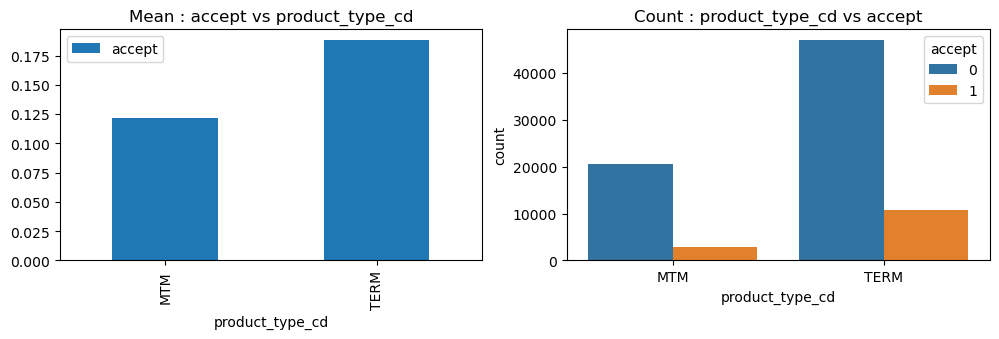

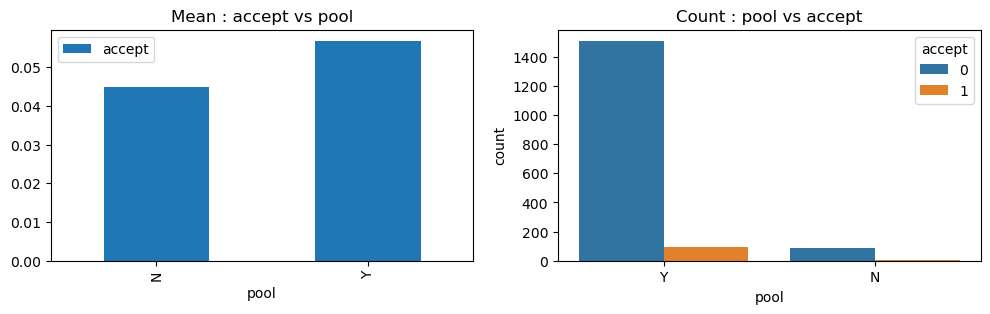

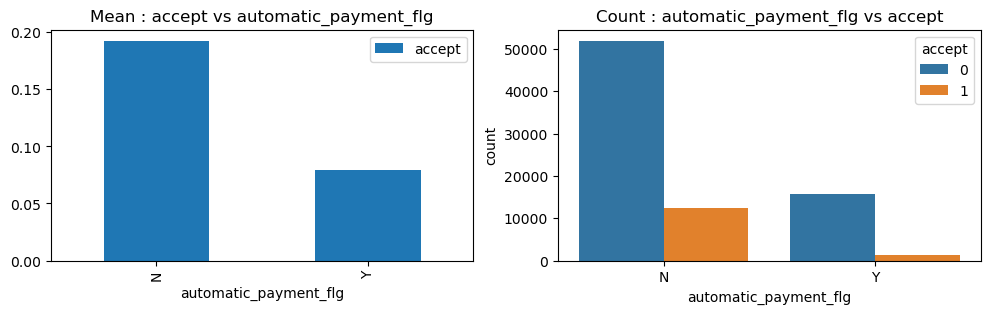

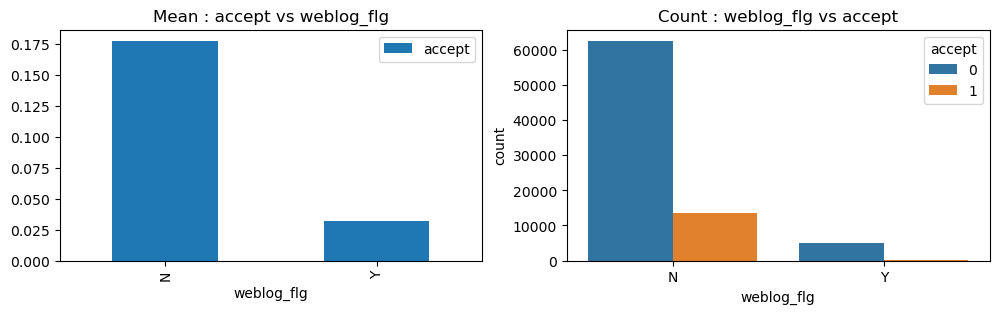

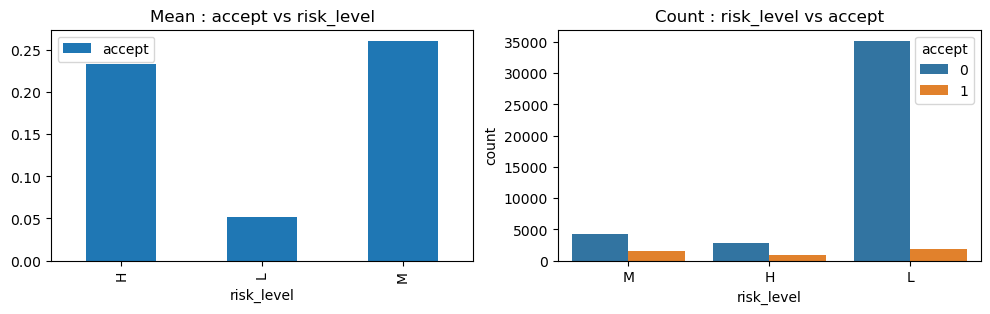

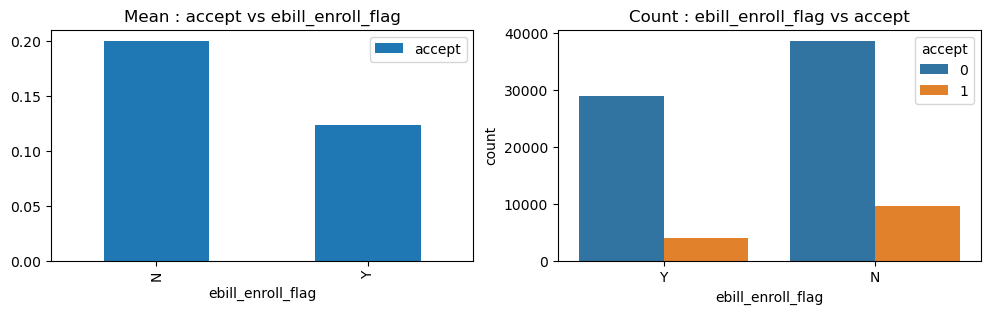

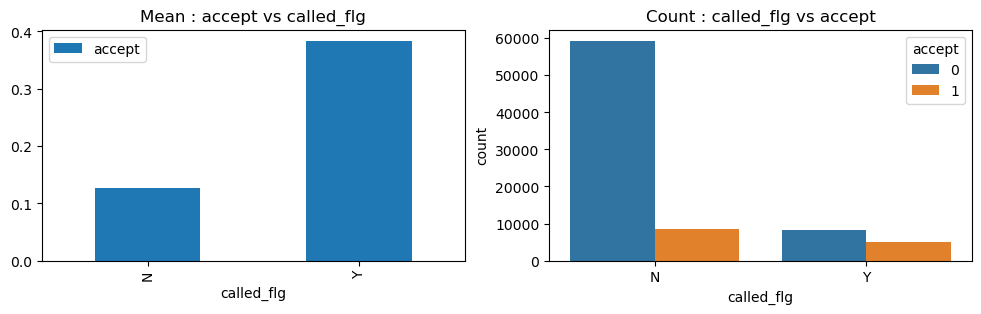

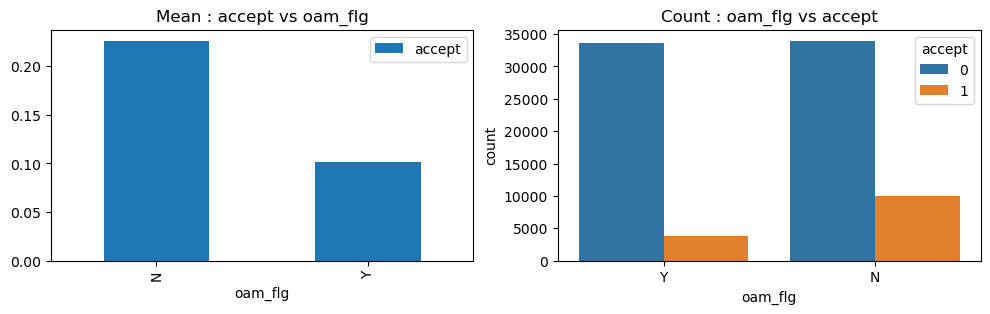

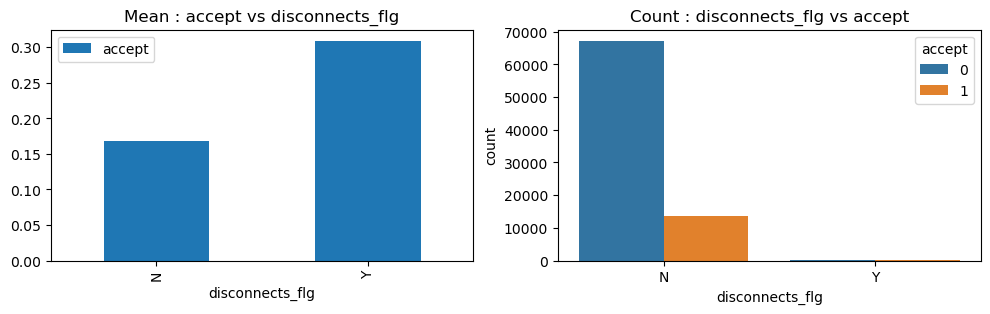

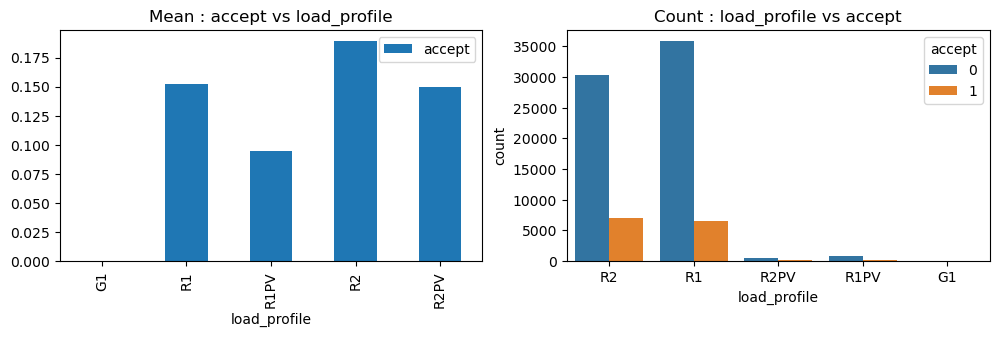

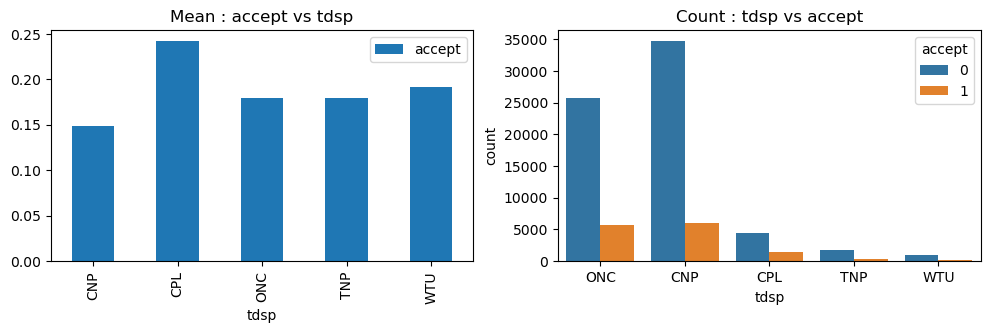

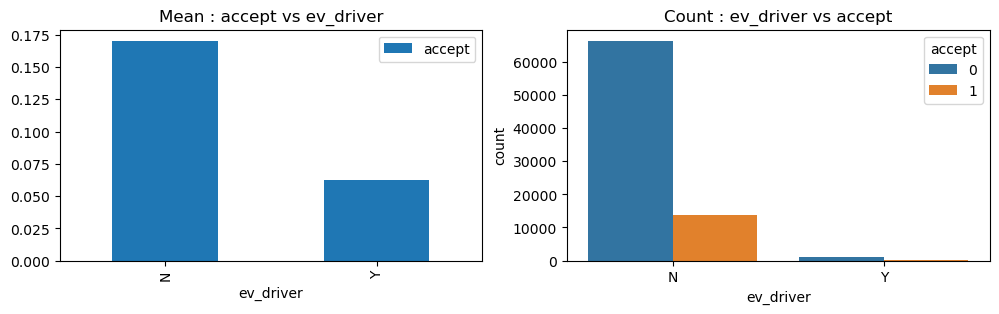

In [39]:
cols_list=['disconotice_flg', 'term_length', 'latefee_flg',
       'dwelling_type_cd', 'product_type_cd', 'pool', 'automatic_payment_flg',
       'weblog_flg', 'risk_level', 'ebill_enroll_flag', 'called_flg',
       'oam_flg',  'disconnects_flg', 'load_profile', 'tdsp',  'ev_driver']
for col in cols_list:
    gen_ctgy_relation(col)

<Axes: xlabel='term_length', ylabel='count'>

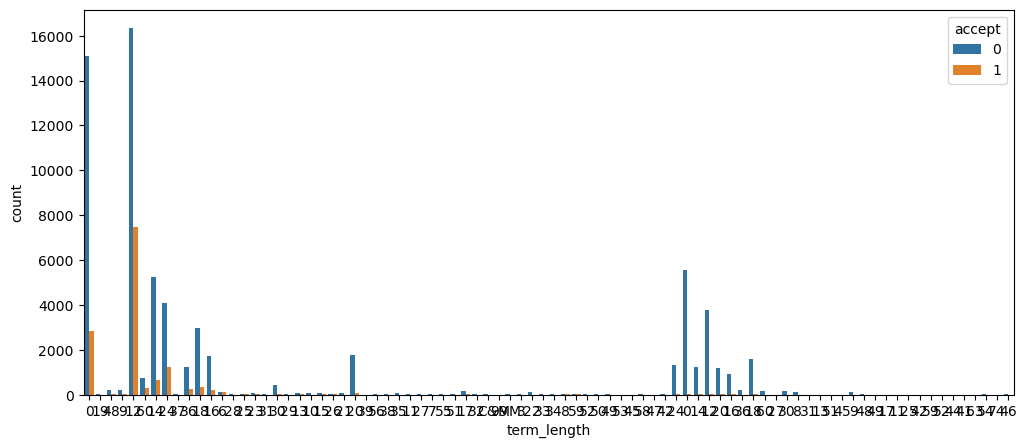

In [41]:
f,ax=plt.subplots(1,1,figsize=(12,5))
sns.countplot(df, x="term_length", hue="accept")